In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import os
import pandas as pd
from ipywidgets import interact, Dropdown

In [8]:
ruta = r"D:\Mateo\ICSI\Proyecto\Data\Raw\Poblacion\Data\Processing"
os.chdir(ruta)
df_2005 = pd.read_csv('pob_censo_area_2005.csv', sep=",", encoding='latin1')
df_2017 = pd.read_csv('pob_censo_area_2017.csv', sep=",", encoding='latin1')

df_2005 = df_2005[['ubigeo', 'distrito', 'tipo_area', 'poblacion', 'acumulado_porcentaje', 'anio']]

df_2017.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ubigeo        5550 non-null   int64 
 1   departamento  5550 non-null   object
 2   provincia     5550 non-null   object
 3   distrito      5536 non-null   object
 4   tipo_area     5550 non-null   object
 5   poblacion     5550 non-null   int64 
 6   anio          5550 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 303.6+ KB


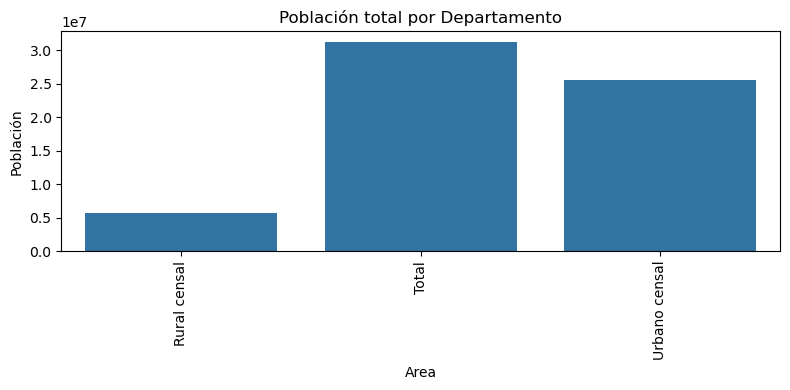

In [9]:
df_2017_dpto = df_2017.groupby('departamento')['poblacion'].sum().reset_index()
df_2017_dpto = df_2017_dpto.sort_values('poblacion', ascending=False)

df_2017_area = df_2017.groupby('tipo_area')['poblacion'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x="tipo_area", y="poblacion", data=df_2017_area)

# Añadimos títulos y etiquetas
plt.title('Población total por Departamento')
plt.xlabel('Area')
plt.ylabel('Población')
plt.xticks(rotation=90) # Rota las etiquetas del eje X para que no se superpongan
plt.tight_layout() # Ajusta el diseño para que todo sea visible
plt.show()


In [10]:
df_2017_area = df_2017.groupby('tipo_area')['poblacion'].sum().reset_index()
categorias_ordenadas = ['Urbano censal', 'Rural censal', 'Total']
df_2017_area['tipo_area'] = pd.Categorical(df_2017_area['tipo_area'], categories=categorias_ordenadas, ordered=True)
df_2017_area = df_2017_area.sort_values('tipo_area')

fig = px.bar(
    df_2017_area,
    x='tipo_area',
    y="poblacion",
    title='Población total por área',
    labels={'tipo_area': 'Área', 'poblacion':'Población'}
)

fig.show()

In [12]:
# Gráfico interactivo

df_distrito_area = df_2017.groupby(['distrito','tipo_area'])['poblacion'].sum().reset_index()
categorias_ordenadas = ['Urbano censal', 'Rural censal', 'Total']
df_distrito_area['tipo_area'] = pd.Categorical(df_distrito_area['tipo_area'], categories=categorias_ordenadas, ordered=True)
lista_distritos = sorted(df_distrito_area['distrito'].unique())

#Crear función

def grafico_interactivo(distrito_seleccionado):
    df_distrito_area_filtrado = df_distrito_area[df_distrito_area['distrito'] == distrito_seleccionado]
    df_distrito_area_filtrado = df_distrito_area_filtrado.sort_values('tipo_area')

    fig = px.bar(
        df_distrito_area_filtrado,
        x='tipo_area',
        y='poblacion',
        title=f'Población por Área en el distrito de {distrito_seleccionado}',
        labels={'tipo_area': 'Área', 'poblacion': 'Población'}     
    )
fig.show()

interact(grafico_interactivo, distrito_seleccionado=Dropdown(options=lista_distritos, description='Distrito:'))


interactive(children=(Dropdown(description='Distrito:', options=('Abancay', 'Abelardo Pardo Lezameta', 'Acarí'…

<function __main__.grafico_interactivo(distrito_seleccionado)>